# Noite de Processing
## Reação-difusão, o que eu tenho a ver com isso?
### Marcelo de Gomensoro Malheiros

Código disponibilizado sob licença Apache-2.0

---

## Inicialização

Este _notebook_ foi preparado para rodar no _imported mode_ do PY5.

Mais detalhes aqui: https://py5.ixora.io/content/py5_modes.html#imported-mode

In [1]:
# carrega extensão para usar o "magic" %%py5bot para imagens estáticas
%load_ext py5

In [2]:
# biblioeta Numpy
import numpy as np

In [3]:
# biblioteca Matplolib
import matplotlib.pyplot as plt

## Plotagem de gráficos

Aqui a ideia é ilustrar rapidamente o uso de Numpy para trabalhar com vetores e matrizes de valores, e também a Matplotlib para exibição de gráficos.

In [4]:
# cria 5 valores igualmente espaçados entre 0 e 10 (incluindo as extremidades)
print(np.linspace(0, 10, 5))

[ 0.   2.5  5.   7.5 10. ]


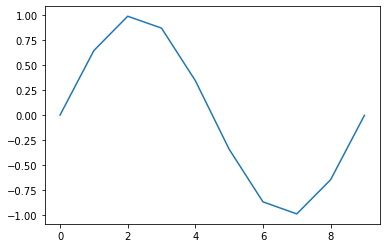

In [5]:
# um vetor de valores (abscissas) é passado para a função seno,
# retornando os respectivos valores de uma senóide (ordenadas)
x = np.sin(np.linspace(0, 6.28, 10))
plt.plot(x)
plt.show()

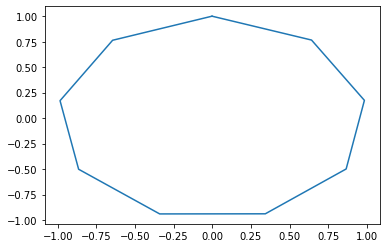

In [6]:
# se calcularmos os cossenos dos mesmos valores e usarmos para um gráfico de
# dispersão com pontos nas coordenadas (x, y), temos um círculo aproximado
y = np.cos(np.linspace(0, 6.28, 10))
plt.plot(x, y)
plt.show()

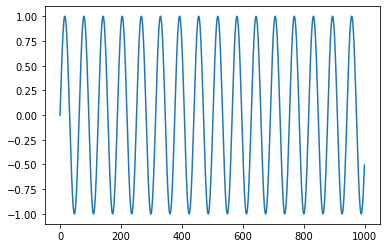

In [7]:
# aqui criamos uma senóide de alta frequência
a = np.sin(np.linspace(0, 100, 1000))
plt.plot(a)
plt.show()

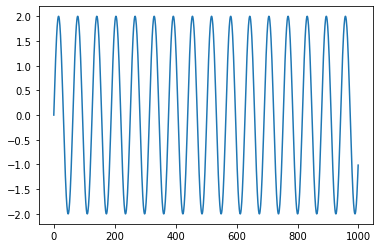

In [8]:
# se um vetor de valores idêntico for criado e somado, o resultado é uma curva de maior amplitude
# (note que basta somar os dois vetores para se obter um vetor com a soma)
b = np.sin(np.linspace(0, 100, 1000))
plt.plot(a + b)
plt.show()

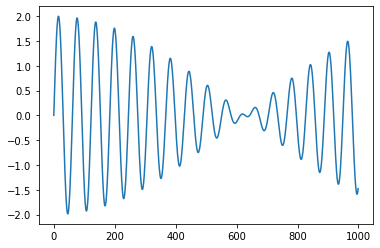

In [9]:
# porém, se a frequência do segundo vetor for ligeiramente diferente,
# temos o fenômeno de interferência
b = np.sin(np.linspace(0, 105, 1000))
plt.plot(a + b)
plt.show()

## Processamento de imagens

O objetivo desta seção é mostrar como imagens são apenas matrizes, e ilustrar algumas operações simples

In [10]:
# matriz com valores aleatórios de 0 a 255
m = np.random.uniform(low=0, high=255, size=(20, 20))

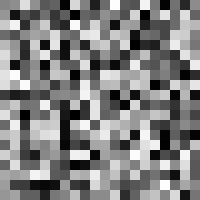

In [11]:
%%py5bot
# exibe matriz como uma imagem em tons de cinza
size(200, 200)
no_smooth()
i = create_image_from_numpy(m, bands='L') # tons de cinza
image(i, 0, 0, width, height)

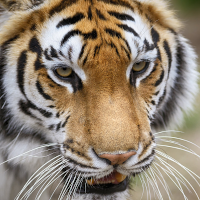

In [12]:
%%py5bot
# exibe matriz como uma imagem colorida (RGB)
size(200, 200)
no_smooth()
i = load_image('tiger.png')
image(i, 0, 0)

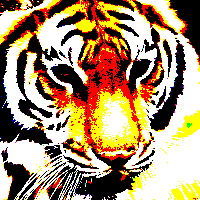

In [13]:
%%py5bot
size(200, 200)
no_smooth()
i = load_image('tiger.png')
i.load_np_pixels()

# operação de limiar (threshold), forçando todos os tons para o máximo (255) ou o mínimo (0)
# é um exemplo clássico de operação pixel-a-pixel, onde cada um é processado independentemente
m = np.zeros_like(i.np_pixels)
for r in range(0, i.height):
    for c in range(0, i.width):
        p = i.np_pixels
        # limiar apenas para o canal vermelho (R)
        #m[r, c, :] = 0 if p[r, c, 1] < 128 else 255

        # limiar para cada canal, em separado
        for n in range(4):
            m[r, c, n] = 0 if p[r, c, n] < 128 else 255
    
i.set_np_pixels(m)
image(i, 0, 0, width, height)

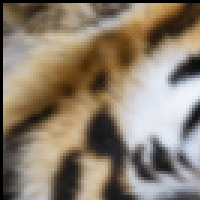

In [14]:
%%py5bot
size(200, 200)
no_smooth()
i = load_image('tiger.png')
i.load_np_pixels()

# operação de borramento (blur), utilizando uma soma ponderada entre um pixel e seus vizinhos
# é um exemplo clássico de operação sobre a vizinhança de um pixel
m = np.zeros_like(i.np_pixels)
for r in range(1, i.height - 1): # da segunda até a penúltima linha
    for c in range(1, i.width - 1): # da segunda até a penúltima coluna
        for n in range(4):
            p = i.np_pixels
            s = (                  0.2*p[r-1,c,n] +
                  0.2*p[r,c-1,n] + 0.2*p[r,  c,n] + 0.2*p[r,c+1,n] +
                                   0.2*p[r+1,c,n])
            m[r, c, n] = s
    
i.set_np_pixels(m)
image(i, 0, 0, width*3, height*3) # zoom no canto superior esquerdo

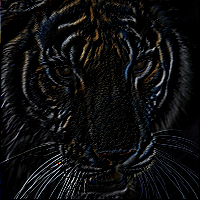

In [15]:
%%py5bot
size(200, 200)
i = load_image('tiger.png')
i.load_np_pixels()

# operação de detecção de bordas (edge detection), equivale a computar diferenças entre pixels da vizinhança
m = np.zeros_like(i.np_pixels)
for r in range(0, i.height - 1):
    for c in range(0, i.width - 1):
        for n in range(4):
            p = i.np_pixels
            s = (                 -1.0*p[r,  c,n] +
                 -1.0*p[r,c-1,n] + 0.0*p[r,  c,n] + 1.0*p[r,c+1,n] +
                                   1.0*p[r+1,c,n])
            m[r, c, n] = max(0, s)
    
i.set_np_pixels(m)
image(i, 0, 0, width, height)

## Autômatos celulares

Aqui a ideia é ilustrar que o conceito de vizinhança se generaliza para um **kernel** ou **stencil**: aplicar operações em volta de cada elemento de uma matriz tem inúmeras aplicações.

In [16]:
# função para criar matriz aleatória apenas com zeros e uns
def random_start(rows, cols):
    a = np.random.random((rows, cols))
    a[a <  0.5] = 0
    a[a >= 0.5] = 1
    return a.astype(int)

In [17]:
a = random_start(5, 5)
print(a)

[[1 0 1 1 1]
 [1 0 1 1 1]
 [1 1 0 0 1]
 [1 0 1 0 1]
 [1 1 1 1 0]]


In [18]:
# funções de manipulação de imagens da biblioteca Scikit-Image
from scipy import ndimage

In [19]:
# esta matriz é uma "máscara" com pesos a serem aplicados a cada elemento de uma matriz
kernel = [[1,1,1],
          [1,0,1],
          [1,1,1]]

In [20]:
# a aplicação de um kernel a uma matriz é uma "convolução"
# aqui o resultado é matriz "c" de contagem de quantos vizinhos tem cada elemento da matriz "a"
c = ndimage.convolve(input=a, weights=kernel, mode='wrap')
print(c)

[[5 7 6 7 7]
 [6 6 4 6 7]
 [6 5 4 6 6]
 [6 7 4 5 5]
 [5 6 5 6 7]]


## Game of Life

O princípio do Game of Life é manter ou trocar o estada de cada _célula_ com base em seu estado anterior 0 ou 1 (linhas abaixo), e também no número de vizinhos com 1 (colunas abaixo).


        0 1 2 3 4 5 6 7 8
    0   0 0 0 1 0 0 0 0 0    0 -> 1 nasce
    1   0 0 1 1 0 0 0 0 0    1 -> 1 sobrevive

In [21]:
rule = [[0,0,0,1,0,0,0,0,0], # nasce
        [0,0,1,1,0,0,0,0,0]] # sobrevive

In [22]:
kernel = [[1,1,1],[1,0,1],[1,1,1]]
cur = np.zeros(shape=(20, 20), dtype=int)
nex = np.zeros_like(cur)

# glider
cur[0, 1] = cur[1, 2] = cur[2, 0] = cur[2, 1] = cur[2, 2] = 1

# blinker
#cur[2, 1] = cur[2, 2] = cur[2, 3] = 1 

# início aleatório
# cur = random_start(20, 20) 

def settings():
    size(200, 200)
    no_smooth() # mostra cada pixel sem interpolação

def setup():
    frame_rate(5) # velocidade devagar
    surface = get_surface()
    surface.set_always_on_top(True) # força ficar sempre acima do notebook
    surface.set_location(100, 200) # defini posição da janela do PY5

def draw():
    global cur, nex # estado corrente e estado seguinte da simulação
    count = ndimage.convolve(cur, kernel, mode='wrap')
    for r in range(0, cur.shape[0]): # para cada linha
        for c in range(0, cur.shape[1]): # para cada coluna
            nex[r, c] = rule[int(cur[r, c])][int(count[r, c])] # aplica regras
    cur = nex.copy() # o estado seguinte calculado passa a ser o corrente

    i = create_image_from_numpy(cur * 255, bands='L')
    image(i, 0, 0, width, height)

run_sketch()

## Equações diferenciais

A ideia aqui é mostrar que um sistema dinâmico pode ser descrito por uma equação diferencial. E que uma equação diferencial pode ser "resolvida" numericamente como se fosse uma simulação, definindo condições iniciais e construindo o estado seguinte com base no estado corrente.

### Exemplo de definição exata (equação analítica):

$f(x) = x^2 + 5$

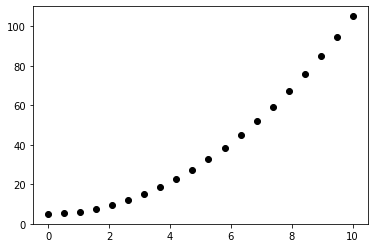

In [23]:
x_exact = np.linspace(0, 10, 20)
f_exact = x_exact ** 2 + 5
plt.plot(x_exact, f_exact, 'ok')
plt.show()

### Exemplo de equação diferencial e condição inicial

${df \over dx} = 2 x$

$f(0) = 5$

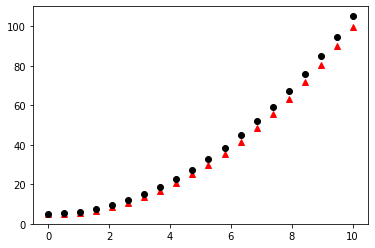

In [24]:
# a resolução numérica é feita discretizando o tempo em pequenos passos, e atualizando 
# a variável de controle "x" e a função "f" através do cálculo da derivada "df"

# condição inicial
x = 0
f = 5

# série de dados para exibição posterior
x_approx = [x]
f_approx = [f]

samples = 20 - 1 # número de amostras

dx = 10 / samples # tamanho do passo

for i in range(samples):
    df = 2 * x * dx # equação diferencial em "x"
    f = f + df
    x = x + dx
    x_approx.append(x)
    f_approx.append(f)

# comparação entre equação analítica e aproximação numérica pela equação diferencial
plt.plot(x_approx, f_approx, '^r')
plt.plot(x_exact,  f_exact,  'ok')
plt.show()

## Difusão

O processo físico de difusão de calor ou químico de difusão de uma substância em um líquido pode ser expresso por uma equação diferencial aplicada a duas (ou mais) dimensões.

A implementação equivale a resolver numericamente uma equação diferencial, usando uma convolução para aproximar uma derivada espacial chamada "laplaciano".

In [25]:
kernel = np.array([[1, 4, 1], [4, -20, 4], [1, 4, 1]]) / 6
cur = np.random.random((50, 50)) # condição inicial aleatória
nex = np.zeros_like(cur)

def settings():
    size(200, 200)
    no_smooth()

def setup():
    frame_rate(5)
    surface = get_surface()
    surface.set_always_on_top(True)
    surface.set_location(100, 200)

def draw():
    global cur, nex

    dif = ndimage.convolve(input=cur, weights=kernel, mode='wrap')
    nex = cur + dif * 0.2
    cur = nex.copy()
    
    vmap = plt.Normalize()
    cmap = plt.cm.jet
    i = create_image_from_numpy(cmap(vmap(cur)) * 255, 'RGBA') # mapa de calor
    image(i, 0, 0, width, height)
    
run_sketch()

## Reação-difusão

Finalmente, construímos uma simulação de reação-difusão adicionando à simulação de **difusão** duas substâncias **a** e **b**, com concentrações distintas, e também termos de **reação**, que permitem o aumento ou diminuição de uma substância com base na concentração atual de ambas.

In [26]:
# parâmetros da simulação
seed  = 2
ratio = 8
scal  = 5
speed = 80
sup_a = 100
sup_b = 100
shap  = (50, 50)

# inicialização da simulação
diff_a = ratio * scal
diff_b = scal
delta_t = 0.01 * speed / 100
np.random.seed(seed)
a = np.full(shap, 4.0, dtype=float)
b = np.full(shap, 4.0, dtype=float) + np.random.random_sample(shap) * 1.0
lap_a = np.empty_like(a)
lap_b = np.empty_like(b)
kernel_a = np.array([[1, 4, 1], [4, -20, 4], [1, 4, 1]]) / 6
kernel_b = np.array([[1, 4, 1], [4, -20, 4], [1, 4, 1]]) / 6

def settings():
    size(200, 200)
    no_smooth()

def setup():
    frame_rate(10)
    surface = get_surface()
    surface.set_always_on_top(True)
    surface.set_location(100, 200)

def draw():
    global a, b

    # laço de simulação
    for iteration in range(50):
        # resolução numérica da equação de reação-difusão
        ndimage.convolve(a, kernel_a, output=lap_a, mode='wrap')
        ndimage.convolve(b, kernel_b, output=lap_b, mode='wrap')        
        na = a + (16 - a * b     + diff_a * lap_a) * delta_t
        nb = b + (a * b - b - 12 + diff_b * lap_b) * delta_t
        np.clip(na, 0.0, sup_a, out=a)
        np.clip(nb, 0.0, sup_b, out=b)
    
    # o padrão emerge mesmo na presença de ruído intenso
    #a += np.random.random_sample(shap) * 0.2
    
    vmap = plt.Normalize()
    cmap = plt.cm.jet
    i = create_image_from_numpy(cmap(vmap(a)) * 255, 'RGBA')
    image(i, 0, 0, width, height)
    
run_sketch()

## Reação-difusão com crescimento

Finalmente, um exemplo mais elaborado: aproximar o crescimento do domínio da reação-difusão com uma série de operações discretas de expansão das matrizes que representam **a** e **b**.

Aqui os parâmetros foram ajustados para produzir um padrão semelhante ao [esquilo de treze listras](https://en.wikipedia.org/wiki/Thirteen-lined_ground_squirrel) (_Ictidomys tridecemlineatus_).

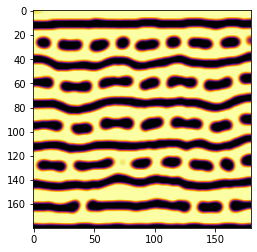

In [27]:
# expansão criando uma nova linha
def grow_one_row_ab():
    global a, b
    rows, cols = a.shape
    new_a = np.zeros((rows + 1, cols))
    new_b = np.zeros((rows + 1, cols))
    new_a[:rows,:] = a[:,:]
    new_b[:rows,:] = b[:,:]
    for col in range(0, cols):
        row = np.random.randint(0, rows)
        new_a[(row+1):(rows+1), col] = a[row:rows, col]
        new_b[(row+1):(rows+1), col] = b[row:rows, col]
    a = new_a
    b = new_b

# expansão criando uma nova coluna
def grow_one_col_ab():
    global a, b
    rows, cols = a.shape
    new_a = np.zeros((rows, cols + 1))
    new_b = np.zeros((rows, cols + 1))
    new_a[:,:cols] = a[:,:]        
    new_b[:,:cols] = b[:,:]        
    for row in range(0, rows):
        col = np.random.randint(0, cols)
        new_a[row, (col+1):(cols+1)] = a[row, col:cols]
        new_b[row, (col+1):(cols+1)] = b[row, col:cols]
    a = new_a
    b = new_b

# parâmetros da simulação
seed  = 1
shap  = (100, 100)
stop  = 16000
ratio = 20
scal  = 4
speed = 40
sup_a = sup_b = 7.2

# inicialização da simulação
diff_a = ratio * scal
diff_b = scal
delta_t = 0.01 * speed / 100
kernel_a = kernel_b = np.array([[1, 4, 1], [4, -20, 4], [1, 4, 1]]) / 6
np.random.seed(seed)
a = np.full(shap, 4.0, dtype=float)
b = np.full(shap, 4.0, dtype=float) + np.random.random_sample(shap) * 0.0
lap_a = np.empty_like(a)
lap_b = np.empty_like(b)

# laço de simulação
for iteration in range(1, stop + 1):
    
    # produção local de "b" e crescimento
    b[0,:] += np.random.rand(b.shape[1]) * 0.01
    if iteration % 200 == 1:
        grow_one_col_ab()
        grow_one_row_ab()
        lap_a = np.empty_like(a)
        lap_b = np.empty_like(b)

    # resolução numérica da equação de reação-difusão
    ndimage.convolve(a, kernel_a, output=lap_a, mode='reflect')
    ndimage.convolve(b, kernel_b, output=lap_b, mode='reflect')        
    na = a + (16 - a * b     + diff_a * lap_a) * delta_t
    nb = b + (a * b - b - 12 + diff_b * lap_b) * delta_t
    np.clip(na, 0.0, sup_a, out=a)
    np.clip(nb, 0.0, sup_b, out=b)
    
plt.imshow(b, cmap='inferno', interpolation='bilinear')
plt.show()